# Writing a training loop from scratch
https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch

## Import libraries

In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from datetime import datetime
import time

# Plotting
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.full.myfun_models import *
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.defs.myfun_plot import *

2023-09-09 23:35:30.946604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


## Data Acquisition

In [2]:
processed_flag = 'pre'

In [3]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
merged_df, dflist = load_dataset(dir_name, processed_flag)

## Get $v_{0}$ mean over each df looping on dflist

In [4]:
# params
v0_guess = 30
NUM_ITER = 500
LEARNING_RATE_v0 = 0.5
flag_save = True

In [5]:
# Create the model NN
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment

# Create the dataset
dataset = dflist



NN structure: 1-2-1
****************************************************************************************************
In df n.1/10 we have 110 scenes
****************************************************************************************************
            - Time interval n.0: [2.24, 2.44]
                * y_true: [31.46006839]
                * v_ann: [-7.169119635364041e-05, 32.08132724838714]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [2.44, 2.64]
                * y_true: [30.07015494]
                * v_ann: [-7.865986844990402e-05, 32.08132724838714]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [2.64, 2.84]
                * y_true: [31.44030878]
                * v_ann: [-6.592003046534956e-05, 32.08132724838714]

--------------------------------------------------------------------------

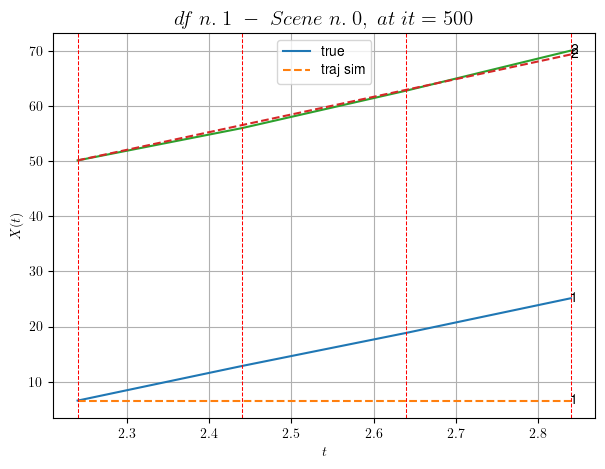

        For scene 0/110
        * use LR_NN=0.0001 with err=0.5355344028529173 at it=19
        * v0_scn_mean = 31.998074158467556
        * MAE = 67.19741750888696



 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7640000000000D+01   r2 =  0.9114193785712D-20
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7640000000000D+01   r2 =  0.9114193785712D-20
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7640000000000D+01   r2 =  0.9114193785712D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next 

/home/andrea/anaconda3/envs/tesi/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7640000000000D+01   r2 =  0.2879301853713D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7640000000000D+01   r2 =  0.2879301853713D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7440000000000D+01   r2 =  0.0000000000000D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.7490000000000D+01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.7440000000000D+01   r2 =  0.7440000000000D+01
 intdy--  t (=r1) illegal        
      in above message,  

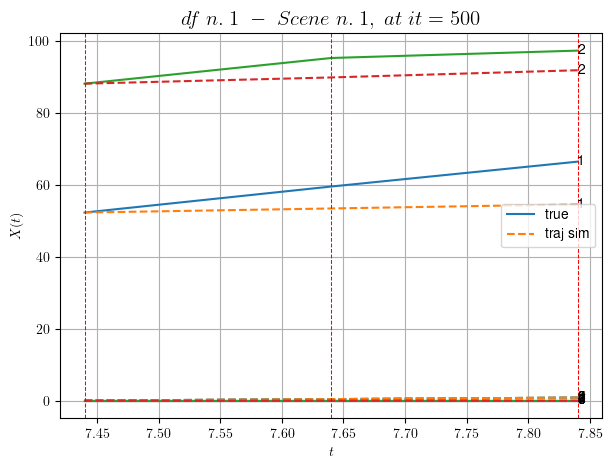

        For scene 1/110
        * use LR_NN=0.0001 with err=19.26898710312722 at it=19
        * v0_scn_mean = 4.196846632030821
        * MAE = 11.466965787031999



        For scene 2/110
        * use LR_NN=0.0001 with err=0.9103718605464909 at it=19
        * v0_scn_mean = 25.084853437458374
        * MAE = 0.3146997325523013



        For scene 3/110
        * use LR_NN=5e-05 with err=5.233292947748812 at it=19
        * v0_scn_mean = 21.421873396816974
        * MAE = 1.2244026589894592



        For scene 4/110
        * use LR_NN=0.0005 with err=1.9575225303235584 at it=19
        * v0_scn_mean = 27.520648636645987
        * MAE = 1.4137018072426495



        For scene 5/110
        * use LR_NN=0.0001 with err=0.20822504055923494 at it=19
        * v0_scn_mean = 29.761347323282816
        * MAE = 0.15695161701524354



            - Time interval n.0: [52.84, 53.04]
                * y_true: [24.68117551]
                * v_ann: [28.913700103759766, 35.9128223540259]

----

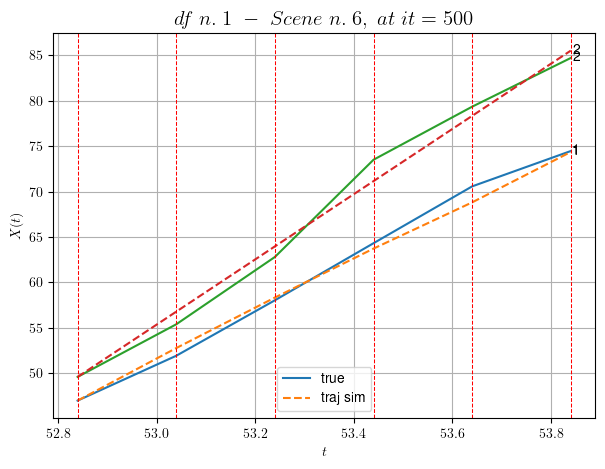

        For scene 6/110
        * use LR_NN=0.0005 with err=28.44976021618508 at it=19
        * v0_scn_mean = 35.676309459910044
        * MAE = 1.2093792368290122



            - Time interval n.0: [54.84, 55.04]
                * y_true: [39.69303006]
                * v_ann: [35.4071044921875, 30.333444658289213]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [55.04, 55.24]
                * y_true: [27.26241914]
                * v_ann: [32.305965423583984, 30.333444658289213]

----------------------------------------------------------------------------------------------------
            * err= 0.3845015150546909
            * Learning rate NN = 0.00036449998151510954
            * diff = 5.462711415976651e-05


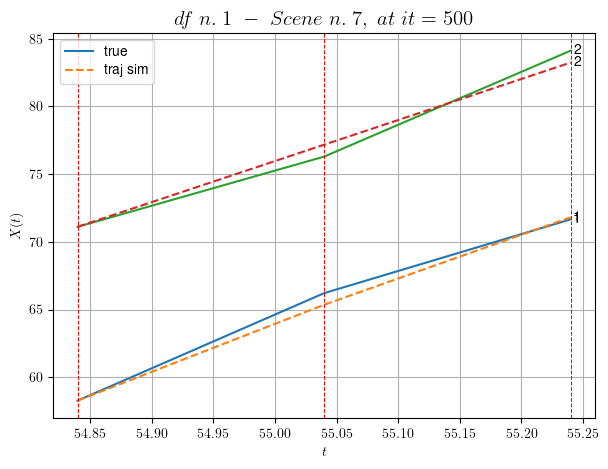

        For scene 7/110
        * use LR_NN=0.0005 with err=0.34273244528685515 at it=19
        * v0_scn_mean = 30.320106871960196
        * MAE = 0.37971249539756846



            - Time interval n.0: [56.84, 57.04]
                * y_true: [23.35104229]
                * v_ann: [23.39900779724121, 35.49695649017791]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [57.04, 57.24]
                * y_true: [29.99173244]
                * v_ann: [24.860145568847656, 35.49695649017791]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [57.24, 57.44]
                * y_true: [26.49185212]
                * v_ann: [27.8507137298584, 35.49695649017791]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [57.44, 57.64]
                * y

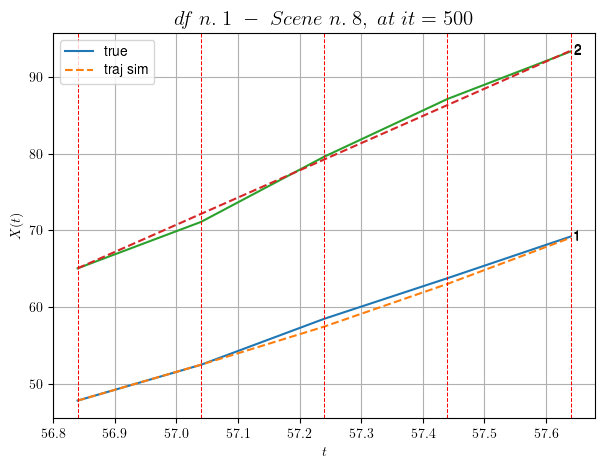

        For scene 8/110
        * use LR_NN=5e-05 with err=4.48364016844921 at it=19
        * v0_scn_mean = 35.277078230612446
        * MAE = 0.3483028565334404



        For scene 9/110
        * use LR_NN=5e-05 with err=1.3618040279390675 at it=19
        * v0_scn_mean = 26.799889273243963
        * MAE = 0.442080420170145



            - Time interval n.0: [80.64, 80.84]
                * y_true: [33.34215633]
                * v_ann: [32.854942321777344, 29.042810010338723]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [80.84, 81.04]
                * y_true: [31.76283343]
                * v_ann: [34.63824462890625, 29.042810010338723]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [81.04, 81.24]
                * y_true: [32.4827505]
                * v_ann: [28.047557830810547, 29.042810010338723]

--

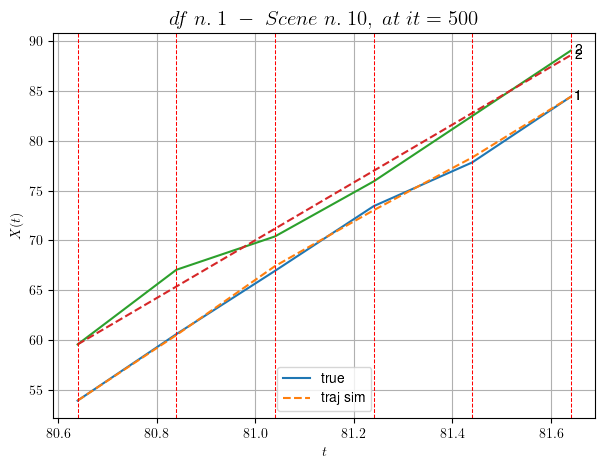

        For scene 10/110
        * use LR_NN=0.0005 with err=1.4628960138691642 at it=19
        * v0_scn_mean = 29.081097609918135
        * MAE = 0.45881807714787254



        For scene 11/110
        * use LR_NN=1e-05 with err=0.3115114337445306 at it=19
        * v0_scn_mean = 31.4480634193075
        * MAE = 0.10513599443220317



            - Time interval n.0: [89.04, 89.24]
                * y_true: [23.80112307]
                * v_ann: [24.1258602142334, 33.1264525586585]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [89.24, 89.44]
                * y_true: [30.25175591]
                * v_ann: [27.05988311767578, 33.1264525586585]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [89.44, 89.64]
                * y_true: [26.85189703]
                * v_ann: [27.490680694580078, 33.1264525586585]

---

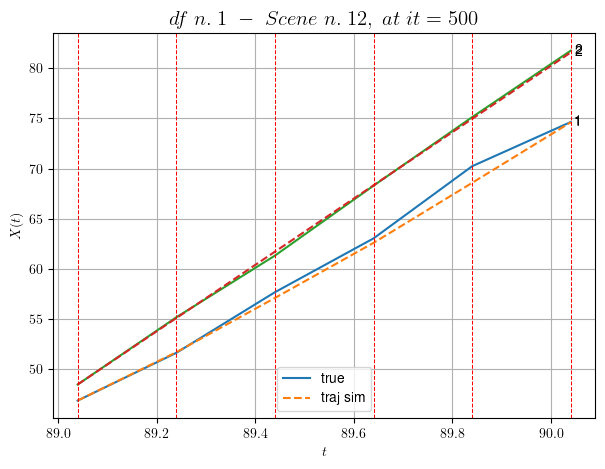

        For scene 12/110
        * use LR_NN=0.0005 with err=6.9516716888203005 at it=19
        * v0_scn_mean = 33.00139445633617
        * MAE = 0.27736092094566



            - Time interval n.0: [90.84, 91.04]
                * y_true: [30.30091015]
                * v_ann: [37.18412399291992, 39.26169927714731]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [91.04, 91.24]
                * y_true: [32.01131791]
                * v_ann: [37.54801559448242, 39.26169927714731]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [91.24, 91.44]
                * y_true: [49.37285732]
                * v_ann: [37.55805587768555, 39.26169927714731]

----------------------------------------------------------------------------------------------------
            * err= 1.1408837017297362
            * Learning rate NN = 

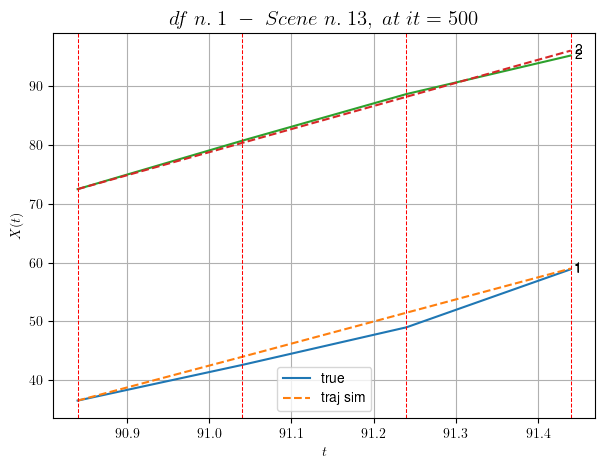

        For scene 13/110
        * use LR_NN=5e-05 with err=6.632938378221224 at it=19
        * v0_scn_mean = 38.89123130613208
        * MAE = 1.1408837017297362



            - Time interval n.0: [109.24, 109.44]
                * y_true: [27.49662615]
                * v_ann: [24.530019760131836, 36.87036026795229]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [109.44, 109.64]
                * y_true: [30.32701959]
                * v_ann: [30.586910247802734, 36.87036026795229]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [109.64, 109.84]
                * y_true: [27.65727146]
                * v_ann: [29.780397415161133, 36.87036026795229]

----------------------------------------------------------------------------------------------------
            * err= 0.606818091225714
            * Learning ra

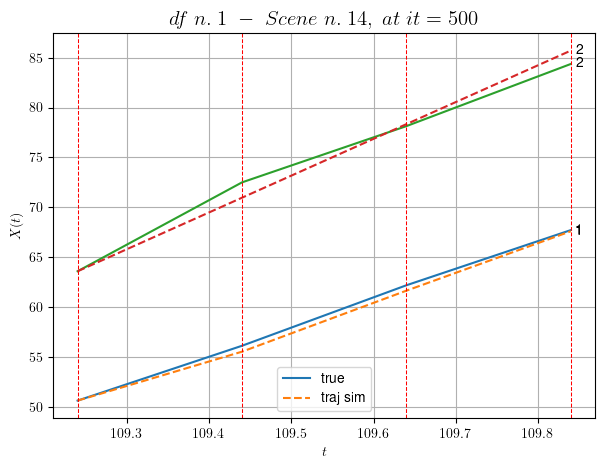

        For scene 14/110
        * use LR_NN=0.001 with err=2.932959681093957 at it=19
        * v0_scn_mean = 36.595545857287085
        * MAE = 0.4825926565222801



            - Time interval n.0: [116.04, 116.24]
                * y_true: [26.72014114]
                * v_ann: [32.78085708618164, 35.75445949476142]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [116.24, 116.44]
                * y_true: [27.07912387]
                * v_ann: [33.610652923583984, 35.75445949476142]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [116.44, 116.64]
                * y_true: [35.55057522]
                * v_ann: [32.25468063354492, 35.75445949476142]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [116.64, 116.84]
             

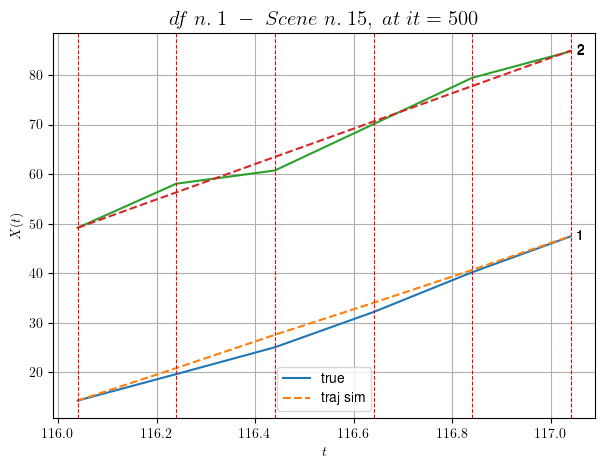

        For scene 15/110
        * use LR_NN=1e-05 with err=7.847383226262744 at it=19
        * v0_scn_mean = 35.52428111501504
        * MAE = 2.0773631914875117



        For scene 16/110
        * use LR_NN=0.0001 with err=0.7672969141432322 at it=19
        * v0_scn_mean = 32.43882181201367
        * MAE = 0.12564557604792956



            - Time interval n.0: [130.64, 130.84]
                * y_true: [25.75092635]
                * v_ann: [26.72441864013672, 33.61924590429427]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [130.84, 131.04]
                * y_true: [30.67141813]
                * v_ann: [27.59697151184082, 33.61924590429427]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [131.04, 131.24]
                * y_true: [29.07678141]
                * v_ann: [28.96981430053711, 33.6192459042942

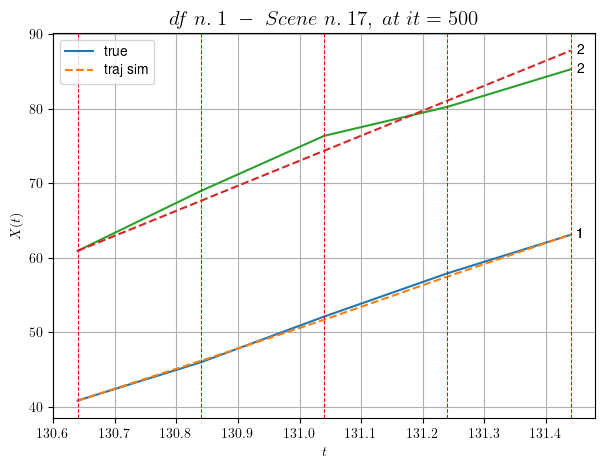

        For scene 17/110
        * use LR_NN=0.0001 with err=1.8853655039625217 at it=19
        * v0_scn_mean = 33.47447606815024
        * MAE = 1.1813773725815222



            - Time interval n.0: [140.64, 140.84]
                * y_true: [23.34058075]
                * v_ann: [27.47934341430664, 34.92834910020664]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [140.84, 141.04]
                * y_true: [28.71099355]
                * v_ann: [25.375728607177734, 34.92834910020664]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [141.04, 141.24]
                * y_true: [30.37630847]
                * v_ann: [29.638715744018555, 34.92834910020664]

----------------------------------------------------------------------------------------------------
            * err= 0.09571237496165128
            * Learning

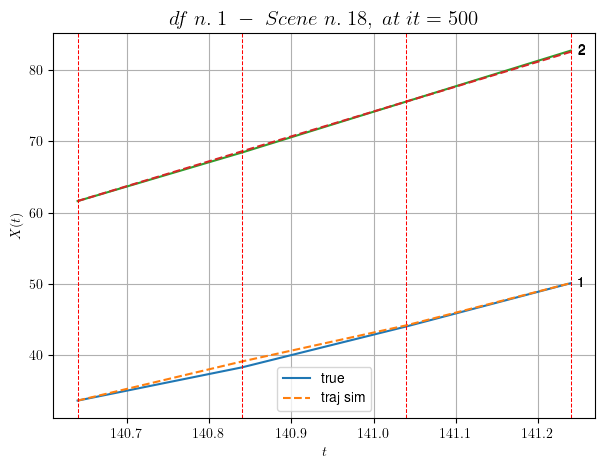

        For scene 18/110
        * use LR_NN=0.0005 with err=1.836232529824733 at it=19
        * v0_scn_mean = 34.73121513623546
        * MAE = 0.06384219931500269



        For scene 19/110
        * use LR_NN=0.0001 with err=0.1917759167466725 at it=19
        * v0_scn_mean = 29.10162419568735
        * MAE = 0.14597246753424148



        For scene 20/110
        * use LR_NN=0.0001 with err=0.9427616508705474 at it=19
        * v0_scn_mean = 24.98275124085014
        * MAE = 0.021655742059747102



        For scene 21/110
        * use LR_NN=5e-05 with err=0.14799792355143213 at it=19
        * v0_scn_mean = 29.818201641124922
        * MAE = 0.12542512871460126



            - Time interval n.0: [193.24, 193.44]
                * y_true: [31.99185522]
                * v_ann: [37.941551208496094, 38.08399937691418]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [193.44, 193.64]
            

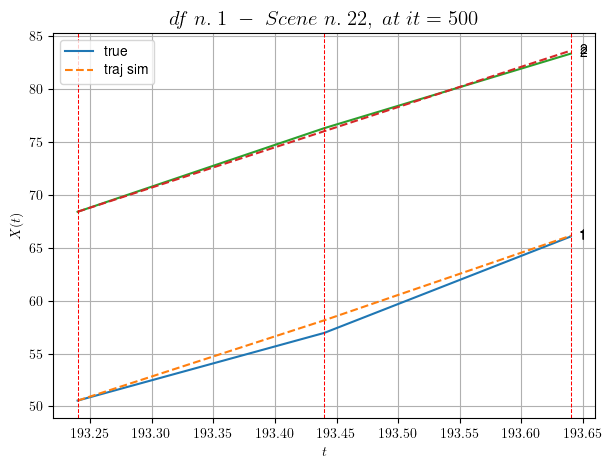

        For scene 22/110
        * use LR_NN=5e-05 with err=2.2520393235561356 at it=19
        * v0_scn_mean = 37.760639401899304
        * MAE = 0.2611785471514517



            - Time interval n.0: [194.84, 195.04]
                * y_true: [28.55698867]
                * v_ann: [34.833335876464844, 35.59272326000108]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [195.04, 195.24]
                * y_true: [40.37855819]
                * v_ann: [37.4095573425293, 35.59272326000108]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [195.24, 195.44]
                * y_true: [39.37369802]
                * v_ann: [36.5020866394043, 35.59272326000108]

----------------------------------------------------------------------------------------------------
            * err= 0.3381176573415968
            * Learning rat

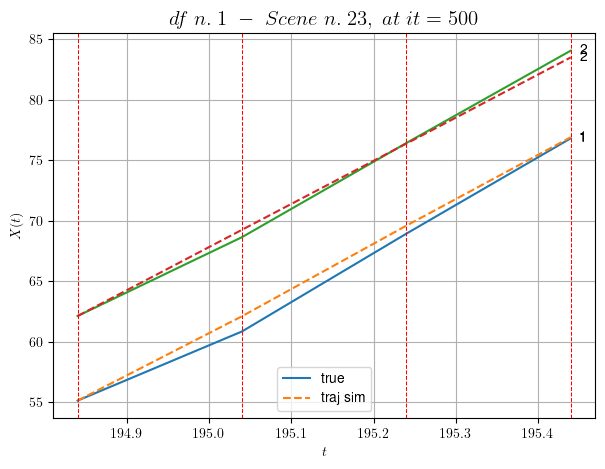

        For scene 23/110
        * use LR_NN=0.0001 with err=2.7845240290888373 at it=19
        * v0_scn_mean = 35.36901432964353
        * MAE = 0.335766010691399



            - Time interval n.0: [199.44, 199.64]
                * y_true: [34.74310553]
                * v_ann: [39.5565185546875, 22.403012729860738]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [199.64, 199.84]
                * y_true: [34.7739018]
                * v_ann: [28.469900131225586, 22.403012729860738]

----------------------------------------------------------------------------------------------------
            * err= 0.16927199651386385
            * Learning rate NN = 0.0007289999630302191
            * diff = 0.00048816301425924635


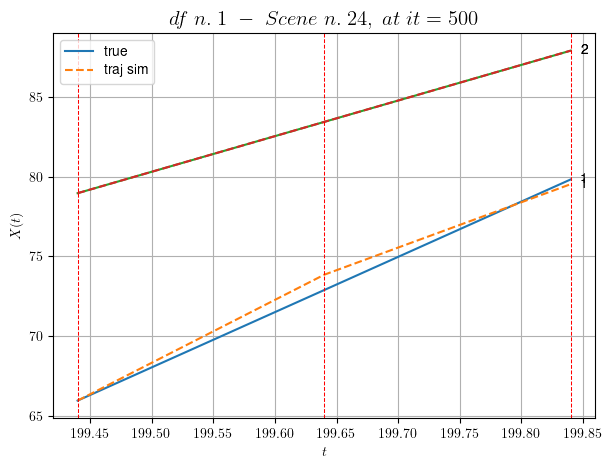

        For scene 24/110
        * use LR_NN=0.001 with err=2.6120450296852624 at it=19
        * v0_scn_mean = 22.706892220608083
        * MAE = 0.15789796879299647



        For scene 25/110
        * use LR_NN=5e-05 with err=0.4982721816122188 at it=19
        * v0_scn_mean = 30.64851140884429
        * MAE = 0.3377765163030151



            - Time interval n.0: [209.64, 209.84]
                * y_true: [26.81089057]
                * v_ann: [29.406869888305664, 31.507071372239356]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [209.84, 210.04]
                * y_true: [27.83624351]
                * v_ann: [29.26854705810547, 31.507071372239356]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [210.04, 210.24]
                * y_true: [33.3769543]
                * v_ann: [29.49661636352539, 31.5070713722

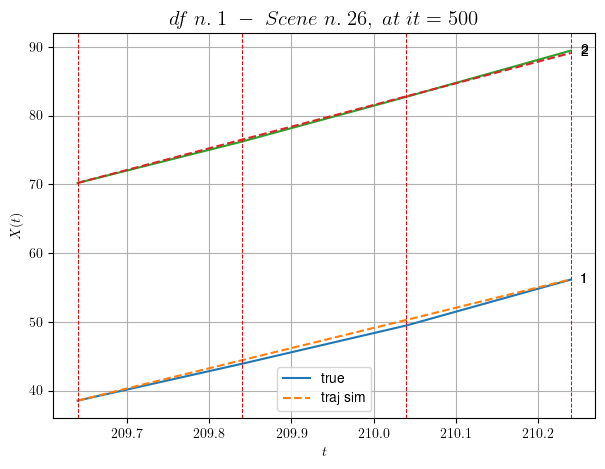

        For scene 26/110
        * use LR_NN=5e-05 with err=0.325489418083952 at it=19
        * v0_scn_mean = 31.446788517361288
        * MAE = 0.14032544718987428



        For scene 27/110
        * use LR_NN=0.0005 with err=0.5779986048226933 at it=19
        * v0_scn_mean = 31.544244978079156
        * MAE = 0.28140208573309644



        For scene 28/110
        * use LR_NN=5e-05 with err=1.0251391469657536 at it=19
        * v0_scn_mean = 32.65115218782267
        * MAE = 0.26298930998759856



            - Time interval n.0: [239.44, 239.64]
                * y_true: [28.64102922]
                * v_ann: [43.72661209106445, 25.426381424530746]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [239.64, 239.84]
                * y_true: [37.49184091]
                * v_ann: [29.694412231445312, 25.426381424530746]

-----------------------------------------------------------------------------

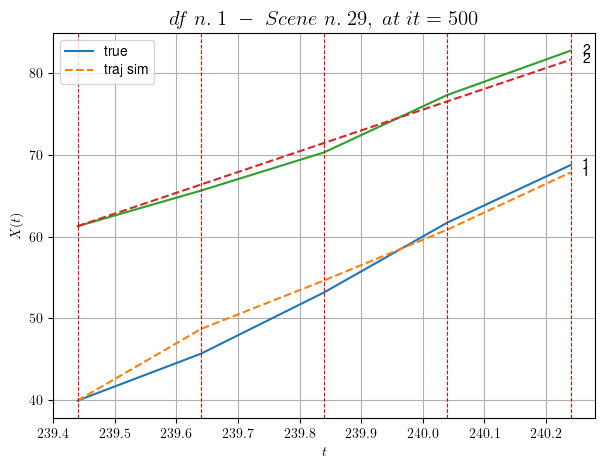

        For scene 29/110
        * use LR_NN=0.0005 with err=5.307511743521612 at it=19
        * v0_scn_mean = 25.609326167514016
        * MAE = 1.6391039086304517



        For scene 30/110
        * use LR_NN=0.0005 with err=1.8477506592584978 at it=19
        * v0_scn_mean = 34.87840300367453
        * MAE = 0.06274093082960107



            - Time interval n.0: [251.44, 251.64]
                * y_true: [32.20057892]
                * v_ann: [28.03780174255371, 35.46332801832255]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [251.64, 251.84]
                * y_true: [27.90071663]
                * v_ann: [28.421430587768555, 35.46332801832255]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [251.84, 252.04]
                * y_true: [31.20108088]
                * v_ann: [29.576997756958008, 35.463328018

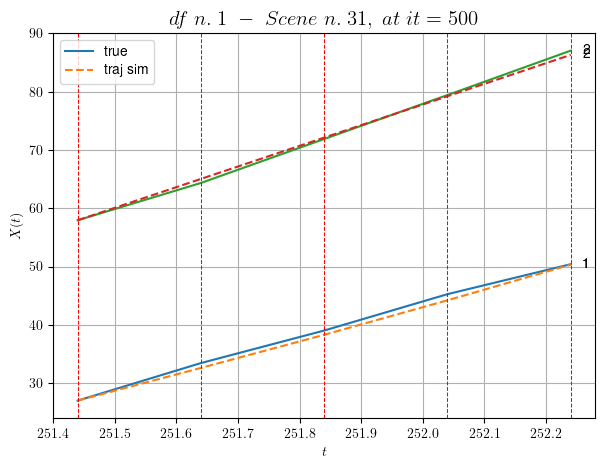

        For scene 31/110
        * use LR_NN=5e-05 with err=4.553017159903762 at it=19
        * v0_scn_mean = 35.244794897631735
        * MAE = 0.34438158353943216



            - Time interval n.0: [261.64, 261.84]
                * y_true: [20.93010778]
                * v_ann: [26.782569885253906, 31.89274028454588]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [261.84, 262.04]
                * y_true: [19.94015095]
                * v_ann: [30.999216079711914, 31.89274028454588]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [262.04, 262.24]
                * y_true: [30.02039251]
                * v_ann: [32.332481384277344, 31.89274028454588]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [262.24, 262.44]
          

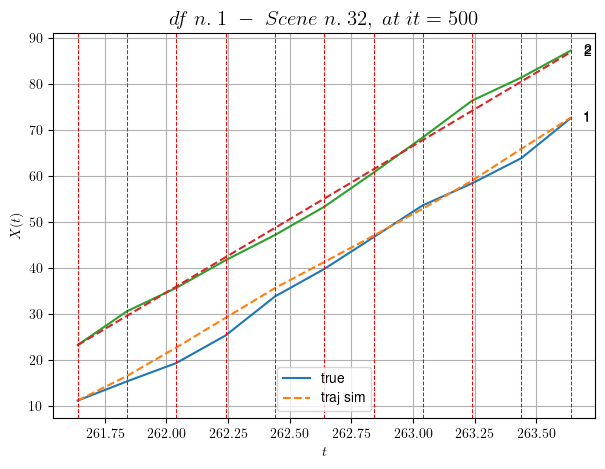

        For scene 32/110
        * use LR_NN=5e-05 with err=4.8888885572892224 at it=19
        * v0_scn_mean = 31.817030673178415
        * MAE = 2.3165458867275577



            - Time interval n.0: [271.04, 271.24]
                * y_true: [29.28204901]
                * v_ann: [32.379127502441406, 36.29888466501512]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [271.24, 271.44]
                * y_true: [38.30326342]
                * v_ann: [35.28238296508789, 36.29888466501512]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [271.44, 271.64]
                * y_true: [35.20368408]
                * v_ann: [35.493465423583984, 36.29888466501512]

----------------------------------------------------------------------------------------------------
            * err= 0.10865459025357435
            * Learning

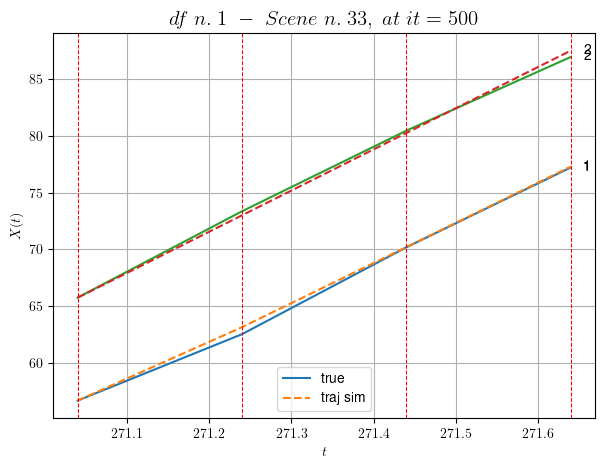

        For scene 33/110
        * use LR_NN=0.0005 with err=2.57312424595819 at it=19
        * v0_scn_mean = 36.046929278462905
        * MAE = 0.10811081764566208



            - Time interval n.0: [272.24, 272.44]
                * y_true: [28.87017174]
                * v_ann: [33.6179084777832, 35.468782603099946]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [272.44, 272.64]
                * y_true: [34.43039204]
                * v_ann: [33.34253692626953, 35.468782603099946]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [272.64, 272.84]
                * y_true: [31.36055806]
                * v_ann: [34.38813018798828, 35.468782603099946]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [272.84, 273.04]
           

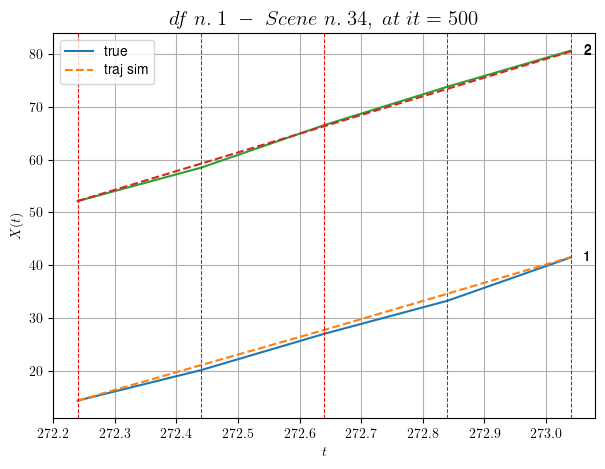

        For scene 34/110
        * use LR_NN=5e-05 with err=4.34345646206409 at it=19
        * v0_scn_mean = 35.25003129901791
        * MAE = 0.402141908494352



            - Time interval n.0: [291.64, 291.84]
                * y_true: [35.45036349]
                * v_ann: [37.77873992919922, 34.11909568875026]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [291.84, 292.04]
                * y_true: [41.11075316]
                * v_ann: [38.68291091918945, 34.11909568875026]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [292.04, 292.24]
                * y_true: [34.09093472]
                * v_ann: [37.67819595336914, 34.11909568875026]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [292.24, 292.44]
                *

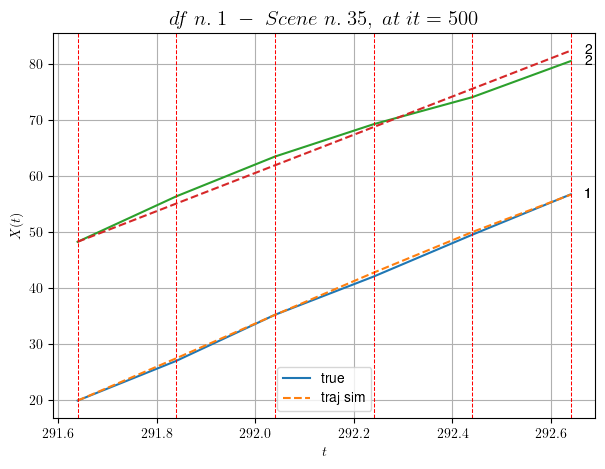

        For scene 35/110
        * use LR_NN=5e-05 with err=2.7880314943011526 at it=19
        * v0_scn_mean = 33.95433186123139
        * MAE = 0.797128852215524



            - Time interval n.0: [294.64, 294.84]
                * y_true: [25.10005748]
                * v_ann: [24.703113555908203, 31.912591419186214]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [294.84, 295.04]
                * y_true: [28.17013329]
                * v_ann: [25.42291831970215, 31.912591419186214]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [295.04, 295.24]
                * y_true: [22.14017228]
                * v_ann: [25.330469131469727, 31.912591419186214]

----------------------------------------------------------------------------------------------------
            * err= 0.9751560215061224
            * Learning

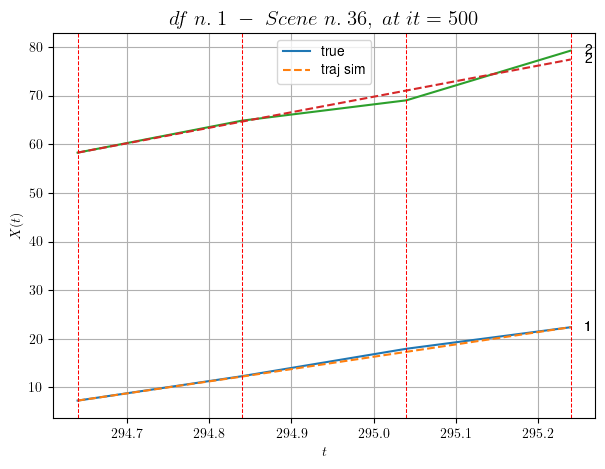

        For scene 36/110
        * use LR_NN=5e-05 with err=1.3977838619958316 at it=19
        * v0_scn_mean = 31.836087762433294
        * MAE = 0.9745407008823226



            - Time interval n.0: [296.44, 296.64]
                * y_true: [27.57673439]
                * v_ann: [24.24293327331543, 32.254865471371716]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [296.64, 296.84]
                * y_true: [19.54627216]
                * v_ann: [23.101844787597656, 32.254865471371716]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [296.84, 297.04]
                * y_true: [17.55160174]
                * v_ann: [24.396631240844727, 32.254865471371716]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [297.04, 297.24]
        

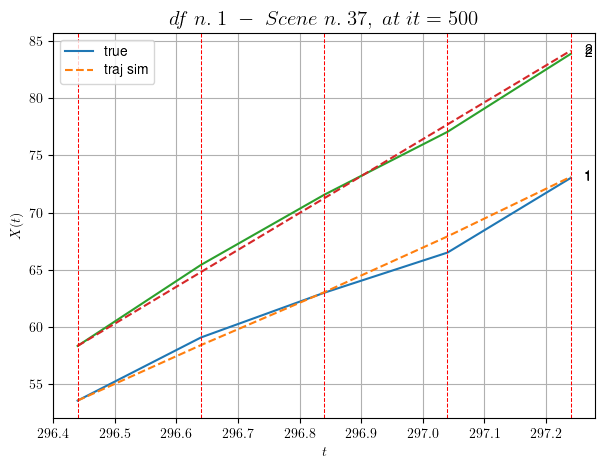

        For scene 37/110
        * use LR_NN=0.0005 with err=2.1232444618316886 at it=19
        * v0_scn_mean = 32.16467085253441
        * MAE = 0.34336164313812534



            - Time interval n.0: [298.04, 298.24]
                * y_true: [30.57625271]
                * v_ann: [23.11403465270996, 33.34266245905457]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [298.24, 298.44]
                * y_true: [30.57625271]
                * v_ann: [24.39252471923828, 33.34266245905457]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [298.44, 298.64]
                * y_true: [15.00082942]
                * v_ann: [28.98332405090332, 33.34266245905457]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [298.64, 298.84]
            

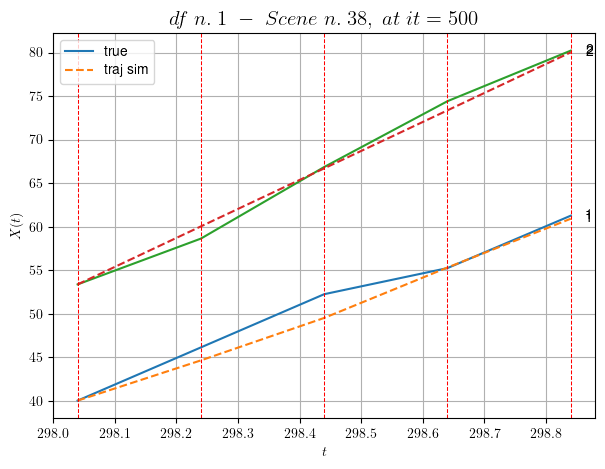

        For scene 38/110
        * use LR_NN=0.0005 with err=3.5508415110690055 at it=19
        * v0_scn_mean = 33.20895596071362
        * MAE = 1.2708180367916846



            - Time interval n.0: [301.44, 301.64]
                * y_true: [23.98073382]
                * v_ann: [29.8177490234375, 25.446081747008517]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [301.64, 301.84]
                * y_true: [31.29145934]
                * v_ann: [30.657365798950195, 25.446081747008517]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [301.84, 302.04]
                * y_true: [33.7516476]
                * v_ann: [28.811275482177734, 25.446081747008517]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [302.04, 302.24]
          

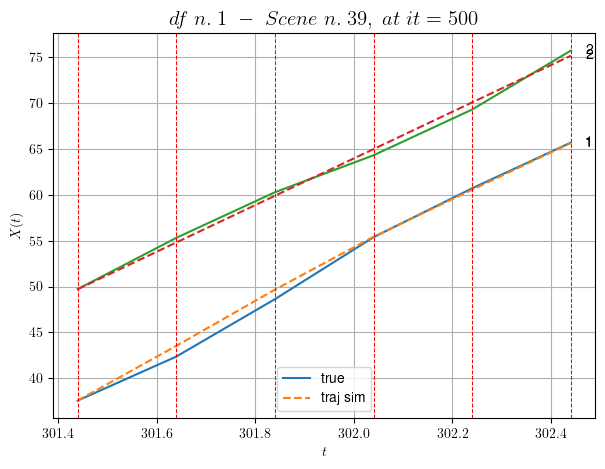

        For scene 39/110
        * use LR_NN=0.0001 with err=4.636432914372777 at it=19
        * v0_scn_mean = 25.62823847709329
        * MAE = 0.35357824622399164



            - Time interval n.0: [307.24, 307.44]
                * y_true: [32.90225561]
                * v_ann: [29.671680450439453, 27.873164065568034]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [307.44, 307.64]
                * y_true: [25.81209386]
                * v_ann: [29.16204833984375, 27.873164065568034]

----------------------------------------------------------------------------------------------------
            * err= 0.08195969937718404
            * Learning rate NN = 7.289998757187277e-05
            * diff = 1.1572404633522493e-05


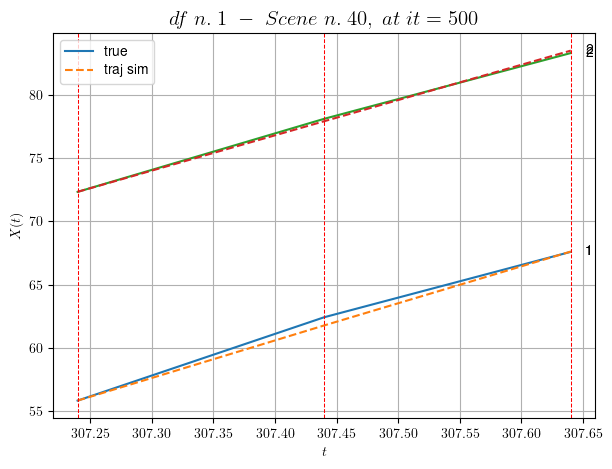

        For scene 40/110
        * use LR_NN=0.0001 with err=0.25854577217367214 at it=19
        * v0_scn_mean = 27.958237502928423
        * MAE = 0.08116383993120481



        For scene 41/110
        * use LR_NN=0.0001 with err=0.4207505934967503 at it=19
        * v0_scn_mean = 28.49079306995713
        * MAE = 0.2368199444747349



            - Time interval n.0: [316.44, 316.64]
                * y_true: [37.30178767]
                * v_ann: [31.570859909057617, 37.33434122714794]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [316.64, 316.84]
                * y_true: [27.85170332]
                * v_ann: [31.299335479736328, 37.33434122714794]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [316.84, 317.04]
                * y_true: [32.2024108]
                * v_ann: [34.32494354248047, 37.33434122

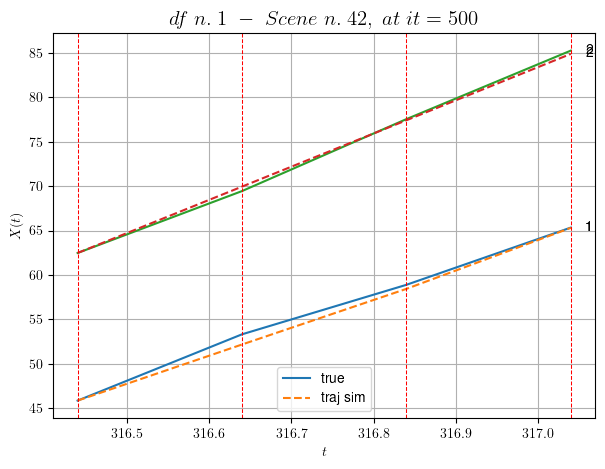

        For scene 42/110
        * use LR_NN=5e-05 with err=4.442553398382875 at it=19
        * v0_scn_mean = 37.04096757811754
        * MAE = 0.2392734319039694



            - Time interval n.0: [317.64, 317.84]
                * y_true: [33.22656212]
                * v_ann: [29.627151489257812, 33.19471835365507]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [317.84, 318.04]
                * y_true: [28.08686413]
                * v_ann: [30.913726806640625, 33.19471835365507]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [318.04, 318.24]
                * y_true: [26.80193964]
                * v_ann: [26.33591651916504, 33.19471835365507]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [318.24, 318.44]
             

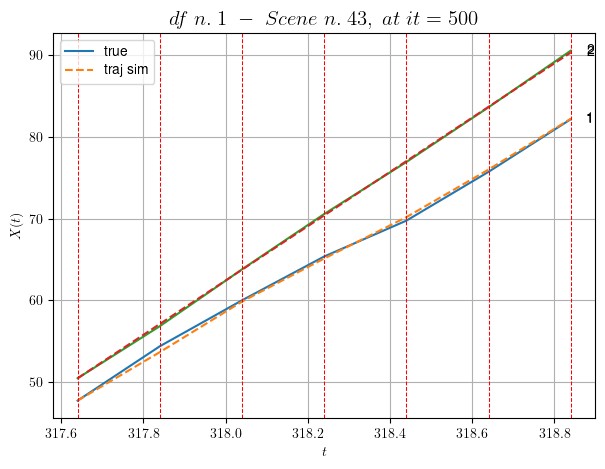

        For scene 43/110
        * use LR_NN=0.0005 with err=18.841989222049698 at it=19
        * v0_scn_mean = 33.066929619531855
        * MAE = 0.07431568334356357



        For scene 44/110
        * use LR_NN=5e-05 with err=1.1307481530187653 at it=19
        * v0_scn_mean = 32.01058746852555
        * MAE = 1.0338596908728999



        For scene 45/110
        * use LR_NN=0.0005 with err=1.1052472116273004 at it=19
        * v0_scn_mean = 29.239916484457687
        * MAE = 0.5205003881063874



            - Time interval n.0: [332.24, 332.44]
                * y_true: [25.53074236]
                * v_ann: [34.782249450683594, 26.651206522068044]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [332.44, 332.64]
                * y_true: [36.42146061]
                * v_ann: [33.27338790893555, 26.651206522068044]

-----------------------------------------------------------------------------

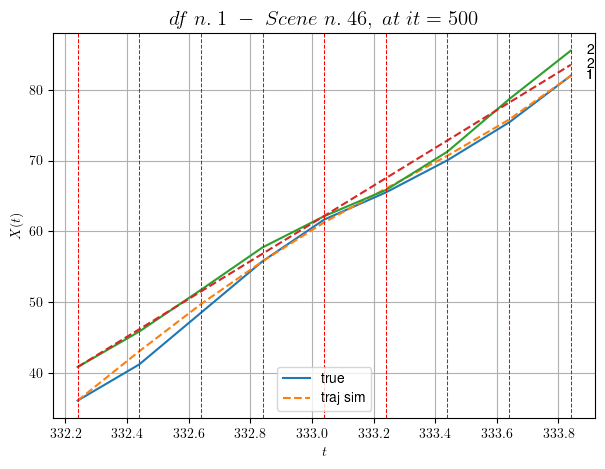

        For scene 46/110
        * use LR_NN=0.001 with err=6.888760644049766 at it=19
        * v0_scn_mean = 26.78515826115865
        * MAE = 0.9091090491157094



        For scene 47/110
        * use LR_NN=5e-05 with err=0.18753092850693043 at it=19
        * v0_scn_mean = 30.30174258282127
        * MAE = 0.1936130433967154



        For scene 48/110
        * use LR_NN=0.0005 with err=3.5153891494389575 at it=19
        * v0_scn_mean = 33.66536393692315
        * MAE = 0.9314901268695435



        For scene 49/110
        * use LR_NN=5e-05 with err=0.5486273526767721 at it=19
        * v0_scn_mean = 30.60059031818867
        * MAE = 0.42797430960411526



            - Time interval n.0: [351.64, 351.84]
                * y_true: [17.20102191]
                * v_ann: [17.070913314819336, 35.128237730719775]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [351.84, 352.04]
                * 

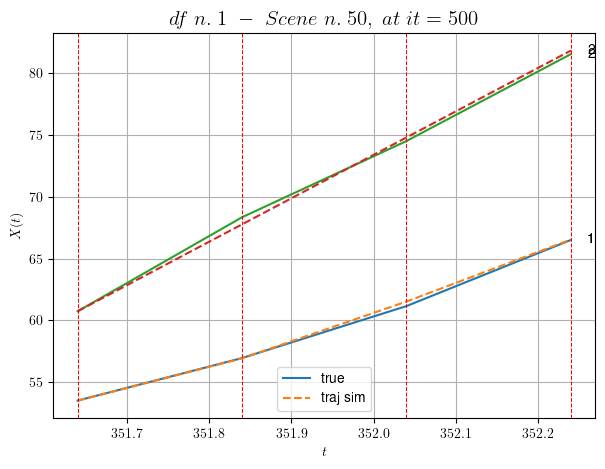

        For scene 50/110
        * use LR_NN=0.0005 with err=1.7162494652073115 at it=19
        * v0_scn_mean = 34.92310822153167
        * MAE = 0.07885686706785075



            - Time interval n.0: [352.84, 353.04]
                * y_true: [30.00089881]
                * v_ann: [23.253131866455078, 29.028563577797485]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [353.04, 353.24]
                * y_true: [27.71101029]
                * v_ann: [26.785499572753906, 29.028563577797485]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [353.24, 353.44]
                * y_true: [24.27617752]
                * v_ann: [26.45081329345703, 29.028563577797485]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [353.44, 353.64]
       

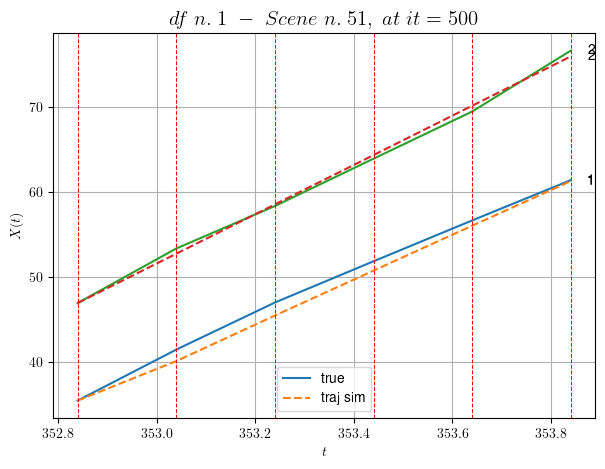

        For scene 51/110
        * use LR_NN=0.001 with err=0.7740548874070212 at it=19
        * v0_scn_mean = 29.06742103467766
        * MAE = 0.4539440445241386



            - Time interval n.0: [358.84, 359.04]
                * y_true: [31.9907758]
                * v_ann: [34.56303405761719, 28.626441976919658]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [359.04, 359.24]
                * y_true: [34.35123345]
                * v_ann: [33.188926696777344, 28.626441976919658]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [359.24, 359.44]
                * y_true: [33.37134022]
                * v_ann: [31.21216583251953, 28.626441976919658]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [359.44, 359.64]
           

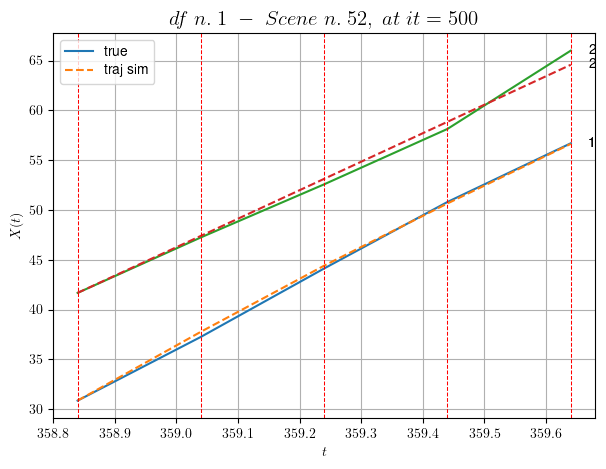

        For scene 52/110
        * use LR_NN=0.0001 with err=0.642015379728321 at it=19
        * v0_scn_mean = 28.681384297833073
        * MAE = 0.32254748431002683



        For scene 53/110
        * use LR_NN=5e-05 with err=0.3826175928496681 at it=19
        * v0_scn_mean = 29.562442040404232
        * MAE = 28.51806624920024



        For scene 54/110
        * use LR_NN=5e-05 with err=3.6551730795091046 at it=19
        * v0_scn_mean = 30.285433475348714
        * MAE = 321.3549606567324



        For scene 55/110
        * use LR_NN=0.0005 with err=1.7019047354851318 at it=19
        * v0_scn_mean = 29.520990349056643
        * MAE = 0.3089556366526171



            - Time interval n.0: [385.04, 385.24]
                * y_true: [29.06003834]
                * v_ann: [31.415056228637695, 36.002897704785276]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [385.24, 385.44]
                

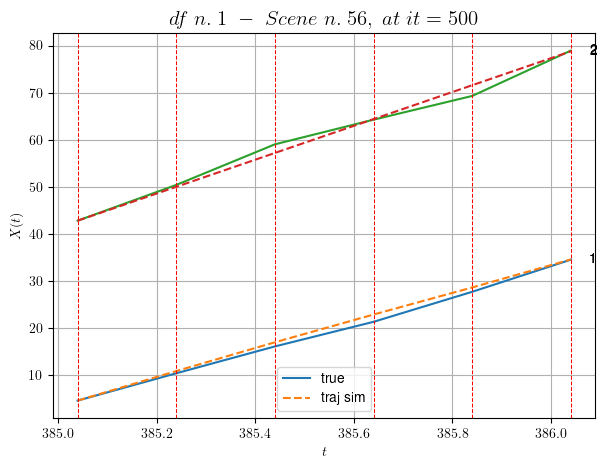

        For scene 56/110
        * use LR_NN=1e-05 with err=6.509603058219008 at it=19
        * v0_scn_mean = 35.762781796639565
        * MAE = 1.0793009990593347



            - Time interval n.0: [393.84, 394.04]
                * y_true: [36.27268123]
                * v_ann: [34.70258712768555, 27.269624216530882]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [394.04, 394.24]
                * y_true: [30.30786624]
                * v_ann: [32.08199691772461, 27.269624216530882]

----------------------------------------------------------------------------------------------------
            * err= 0.033948372757262875
            * Learning rate NN = 0.00036449998151510954
            * diff = 0.0001436424188032484


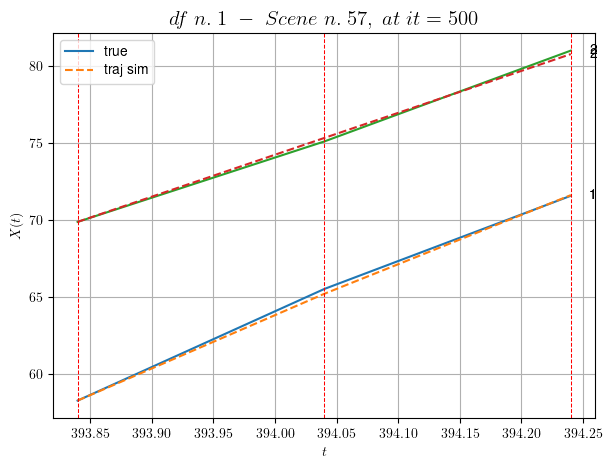

        For scene 57/110
        * use LR_NN=0.0005 with err=0.22436423395019395 at it=19
        * v0_scn_mean = 27.37883924784928
        * MAE = 0.033948372757262875



            - Time interval n.0: [402.04, 402.24]
                * y_true: [38.60215299]
                * v_ann: [40.123558044433594, 31.00675921223626]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [402.24, 402.44]
                * y_true: [38.60215299]
                * v_ann: [35.77043151855469, 31.00675921223626]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [402.44, 402.64]
                * y_true: [32.70290702]
                * v_ann: [32.52431869506836, 31.00675921223626]

----------------------------------------------------------------------------------------------------
            - Time interval n.3: [402.64, 402.84]
         

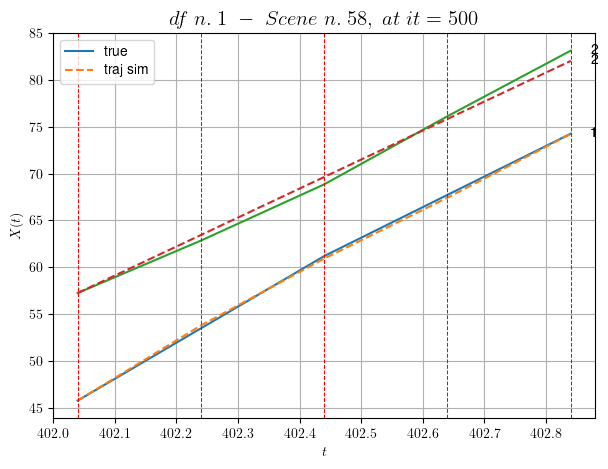

        For scene 58/110
        * use LR_NN=0.0001 with err=0.6612477696972769 at it=19
        * v0_scn_mean = 30.96648884375447
        * MAE = 0.25177428448266825



        For scene 59/110
        * use LR_NN=0.01 with err=133.83623999723704 at it=19
        * v0_scn_mean = 32.3648019172721
        * MAE = 26.948849543726432



        For scene 60/110
        * use LR_NN=0.001 with err=11.778365098559258 at it=19
        * v0_scn_mean = 35.41939034248681
        * MAE = 205.6682613935316



        For scene 61/110
        * use LR_NN=0.0005 with err=1.0187495127548547 at it=19
        * v0_scn_mean = 27.059017681403823
        * MAE = 84.23464169052554



        For scene 62/110
        * use LR_NN=5e-05 with err=1.0720806247319763 at it=19
        * v0_scn_mean = 28.088590792629688
        * MAE = 232.81441358667985



        For scene 63/110
        * use LR_NN=5e-05 with err=7.655803563687398 at it=19
        * v0_scn_mean = 28.631792003967554
        * MAE = 101.151168186

        For scene 89/110
        * use LR_NN=0.0005 with err=1.5375736504320274 at it=19
        * v0_scn_mean = 32.14096981011879
        * MAE = 79.96240674349637



        For scene 90/110
        * use LR_NN=0.0001 with err=1.3401314813551315 at it=19
        * v0_scn_mean = 36.50803476622434
        * MAE = 45.2191453621453



        For scene 91/110
        * use LR_NN=0.0001 with err=9.966370410155802 at it=19
        * v0_scn_mean = 34.410756406254016
        * MAE = 58.63155142475014



        For scene 92/110
        * use LR_NN=0.0005 with err=10.021322923037598 at it=19
        * v0_scn_mean = 32.78855579247937
        * MAE = 39.18453854449964



        For scene 93/110
        * use LR_NN=0.0005 with err=2.119340415324587 at it=19
        * v0_scn_mean = 27.75541871640506
        * MAE = 39.71913461759049



        For scene 94/110
        * use LR_NN=0.001 with err=31.7226669718381 at it=19
        * v0_scn_mean = 35.45019959697332
        * MAE = 242.73231370604853

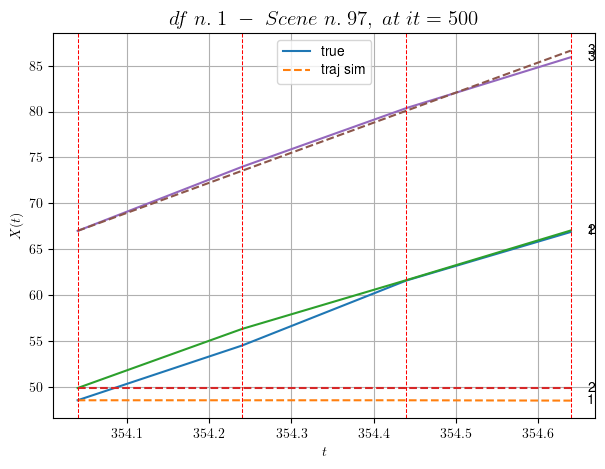

        For scene 97/110
        * use LR_NN=0.001 with err=24.53947583468044 at it=19
        * v0_scn_mean = 32.5319109634925
        * MAE = 84.6497450206012



        For scene 98/110
        * use LR_NN=0.0005 with err=23.704547857401334 at it=19
        * v0_scn_mean = 38.179873997847736
        * MAE = 75.65701882058613



        For scene 99/110
        * use LR_NN=0.0005 with err=59.53214058468016 at it=19
        * v0_scn_mean = 38.567262772518546
        * MAE = 184.61328318823598



        For scene 100/110
        * use LR_NN=0.001 with err=8.773462565500497 at it=19
        * v0_scn_mean = 30.07214827898319
        * MAE = 45.81118198473701



        For scene 101/110
        * use LR_NN=0.0005 with err=12.211657110595374 at it=19
        * v0_scn_mean = 29.621188890643776
        * MAE = 64.93823110501944



        For scene 102/110
        * use LR_NN=0.001 with err=24.714327023314862 at it=19
        * v0_scn_mean = 32.326384041325234
        * MAE = 79.4944490270

/home/andrea/anaconda3/envs/tesi/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2960000000000D+01   r2 =  0.2986473129314D-23
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2960000000000D+01   r2 =  0.2986473129314D-23
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2960000000000D+01   r2 =  0.2986473129314D-19
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2960000000000D+01   r2 =  0.2986473129314D-19
 lsoda--  warning..internal t (=r1) 

UnboundLocalError: local variable 't_best' referenced before assignment

In [ ]:
info_alldataset = []

start_time1 = time.time()
for DOE_struct in DOE:
     
    print("\n")
    print("=="*30)
    
    s = '-'.join(str(x) for x in DOE_struct)
    print(f"NN structure: {s}")

    start_time2 = time.time()
    
    # Create the model
    model = create_model(DOE_struct)
    
    info_dataset = solve_nn_dataset(model, v0_guess, dataset, NUM_ITER, LEARNING_RATE_v0)
    
    # Store info about the NN structure
    nrow = info_dataset.shape[0]
    info_dataset['DOE'] = [DOE_struct]*nrow
    info_dataset['processed'] = [processed_flag]*nrow

    # Append info_dflist
    info_alldataset.append(info_dataset)
    
    time_taken=time.time() - start_time2
    print(f"\nTime taken using {s} NN structure: {'{0:.02f}'.format(time_taken)}")
    
time_taken=time.time() - start_time1
print(f"\nTime taken for the computation: {'{0:.02f}'.format(time_taken)}")

In [ ]:
# To better handling info_dataset
tmp = info_alldataset
info_alldataset = pd.concat(tmp, sort=False)

## Prepare the out dir

In [ ]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    df_seen = [df['N. file'][0] for df in dataset]
    df_seen_str = '-'.join(str(x) for x in df_seen)
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_df{df_seen_str}_{NUM_ITER}it-{processed_flag}")
    
    path = 'out/' + d
    os.mkdir(path)
    
    # Save the solution in a file
    namefile = '/info_alldataset.txt'

    with open(path + namefile, 'w') as output:
        info_alldataset.to_csv(path + namefile, sep=',', index=False)

## Plot

In [ ]:
ms2kmh = 3.6

for d in DOE:
    
    # Initialize the figure
    width, height = 7, 5
    fig, ax = plt.subplots(figsize=(width,height))
    
    info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    for _, scn in info_dataset.iterrows():

        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
                   "\n"  # Newline: the backslash is interpreted as usual
                 fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(d)}$",fontsize=14)

    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);

    plt.show()
    
    # Save figure
    if flag_save:

        title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-{str(d[1]).zfill(2)}"     
        fig.savefig(path+title+ext, bbox_inches='tight')

> **WARNING**: The maximal km speed allowed on the highway is 100 h

### Plot togheter

In [ ]:
# define subplot grid
width, height = 7, 5
nfig = len(DOE)

fig, axes = plt.subplots(nrows=1, ncols=nfig, figsize = (width*nfig,height))
plt.subplots_adjust(hspace=0.4)

suptitle = fr"$Velocities\ v_{0}\ of\ the\ leading\ car,\ using\ {NUM_ITER}\ iter$"
fig.suptitle(suptitle, fontsize=30, y=1.075)

ms2kmh = 3.6

for ax, d in zip(axes.ravel(), DOE):

    # get the right df
    info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    for _, scn in info_dataset.iterrows():

        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')
        
    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$NN\ structure\ {d}$",fontsize=20)

    # Limits
    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    
plt.show()

In [ ]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-ALL"     
    fig.savefig(path+title+ext, bbox_inches='tight')

### Plot comparing

In [ ]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['black', 'royalblue', 'coral']

for step, d in enumerate(DOE):   
        
    # get the right df
    info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0_scn_mean']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=str(d))

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car, with\ {NUM_ITER}\ iter$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

In [ ]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}iter_NN-ALL-comparing"
    fig.savefig(path+title+ext, bbox_inches='tight')